In [191]:

!pip install xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [195]:
df=pd.read_csv("/Users/aman/Downloads/spotify dataset.csv")

In [199]:
#head
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [203]:
df.tail()

track_id                            track_name  \
32828  7bxnKAamR3snQ1VGLuVfC1  City Of Lights - Official Radio Edit   
32829  5Aevni09Em4575077nkWHz   Closer - Sultan & Ned Shepard Remix   
32830  7ImMqPP3Q1yfUHvsdn7wEo          Sweet Surrender - Radio Edit   
32831  2m69mhnfQ1Oq6lGtXuYhgX        Only For You - Maor Levi Remix   
32832  29zWqhca3zt5NsckZqDf6c                Typhoon - Original Mix   

         track_artist  track_popularity          track_album_id  \
32828    Lush & Simon                42  2azRoBBWEEEYhqV6sb7JrT   
32829  Tegan and Sara                20  6kD6KLxj7s8eCE3ABvAyf5   
32830     Starkillers                14  0ltWNSY9JgxoIZO4VzuCa6   
32831          Mat Zo                15  1fGrOkHnHJcStl14zNx8Jy   
32832    Julian Calor                27  0X3mUOm6MhxR7PzxG95rAo   

                   track_album_name track_album_release_date    playlist_name  \
32828    City Of Lights (Vocal Mix)               2014-04-28  ♥ EDM LOVE 2020   
32829                Closer Remixed               2013-03-08  ♥ EDM LOVE 2020   
32830  Sweet Surrender (Radio Edit)               2014-04-21  ♥ EDM LOVE 2020   
32831        Only For You (Remixes)               2014-01-01  ♥ EDM LOVE 2020   
32832                 Typhoon/Storm               2014-03-03  ♥ EDM LOVE 2020   

                  playlist_id playlist_genre  ... key  loudness  mode  \
32828  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -1.814     1   
32829  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   0    -4.462     1   
32830  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   6    -4.899     0   
32831  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   2    -3.361     1   
32832  6jI1gFr6ANFtT8MmTvA2Ux            edm  ...   5    -4.571     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
32828       0.0936      0.076600          0.000000    0.0668   0.2100   
32829       0.0420      0.001710          0.004270    0.3750   0.4000   
32830       0.0481      0.108000          0.000001    0.1500   0.4360   
32831       0.1090      0.007920          0.127000    0.3430   0.3080   
32832       0.0385      0.000133          0.341000    0.7420   0.0894   

         tempo  duration_ms  
32828  128.170       204375  
32829  128.041       353120  
32830  127.989       210112  
32831  128.008       367432  
32832  127.984       337500  

[5 rows x 23 columns]

In [207]:
#SANITY CHECK

In [211]:
df.shape

(32833, 23)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [219]:
#MISSING VALUES
df.isnull().sum()


track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [223]:
#precentage of missing values
df.isnull().sum()/df.shape[0]*100



track_id                    0.000000
track_name                  0.015229
track_artist                0.015229
track_popularity            0.000000
track_album_id              0.000000
track_album_name            0.015229
track_album_release_date    0.000000
playlist_name               0.000000
playlist_id                 0.000000
playlist_genre              0.000000
playlist_subgenre           0.000000
danceability                0.000000
energy                      0.000000
key                         0.000000
loudness                    0.000000
mode                        0.000000
speechiness                 0.000000
acousticness                0.000000
instrumentalness            0.000000
liveness                    0.000000
valence                     0.000000
tempo                       0.000000
duration_ms                 0.000000
dtype: float64

In [227]:
#Finding duplicates
df.duplicated().sum()

0

In [231]:
#Identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3AKwyujeGxTQSZNbx9Ka3c     1
3ITvHA9zhZZdBJsOsAUegF     1
5gsW8TMmNVnevjq13h0Nlp     1
4pN4icvWINm9uN3bElfbec     1
29zWqhca3zt5NsckZqDf6c     1
Name: count, Length: 28356, dtype: int64
******************************
track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64
******************************
track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches      

EXPLORATORY DATA ANALYSIS(EDA)

In [239]:
#Descriptive statistics
df.describe().T

count           mean           std          min  \
track_popularity  32833.0      42.477081     24.984074     0.000000   
danceability      32833.0       0.654850      0.145085     0.000000   
energy            32833.0       0.698619      0.180910     0.000175   
key               32833.0       5.374471      3.611657     0.000000   
loudness          32833.0      -6.719499      2.988436   -46.448000   
mode              32833.0       0.565711      0.495671     0.000000   
speechiness       32833.0       0.107068      0.101314     0.000000   
acousticness      32833.0       0.175334      0.219633     0.000000   
instrumentalness  32833.0       0.084747      0.224230     0.000000   
liveness          32833.0       0.190176      0.154317     0.000000   
valence           32833.0       0.510561      0.233146     0.000000   
tempo             32833.0     120.881132     26.903624     0.000000   
duration_ms       32833.0  225799.811622  59834.006182  4000.000000   

                          25%            50%           75%         max  
track_popularity      24.0000      45.000000      62.00000     100.000  
danceability           0.5630       0.672000       0.76100       0.983  
energy                 0.5810       0.721000       0.84000       1.000  
key                    2.0000       6.000000       9.00000      11.000  
loudness              -8.1710      -6.166000      -4.64500       1.275  
mode                   0.0000       1.000000       1.00000       1.000  
speechiness            0.0410       0.062500       0.13200       0.918  
acousticness           0.0151       0.080400       0.25500       0.994  
instrumentalness       0.0000       0.000016       0.00483       0.994  
liveness               0.0927       0.127000       0.24800       0.996  
valence                0.3310       0.512000       0.69300       0.991  
tempo                 99.9600     121.984000     133.91800     239.440  
duration_ms       187819.0000  216000.000000  253585.00000  517810.000

In [243]:
df.describe(include="object")

track_id track_name   track_artist  \
count                    32833      32828          32828   
unique                   28356      23449          10692   
top     7BKLCZ1jbUBVqRi2FVlTVw     Poison  Martin Garrix   
freq                        10         22            161   

                track_album_id track_album_name track_album_release_date  \
count                    32833            32828                    32833   
unique                   22545            19743                     4530   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              139                      270   

          playlist_name             playlist_id playlist_genre  \
count             32833                   32833          32833   
unique              449                     471              6   
top     Indie Poptimism  4JkkvMpVl4lSioqQjeAL0q            edm   
freq                308                     247           6043   

                playlist_subgenre  
count                       32833  
unique                         24  
top     progressive electro house  
freq                         1809

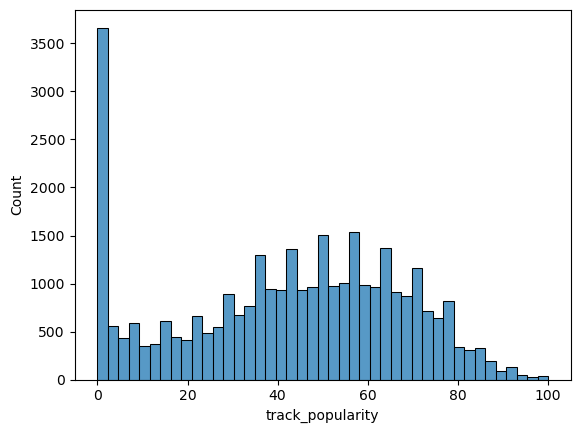

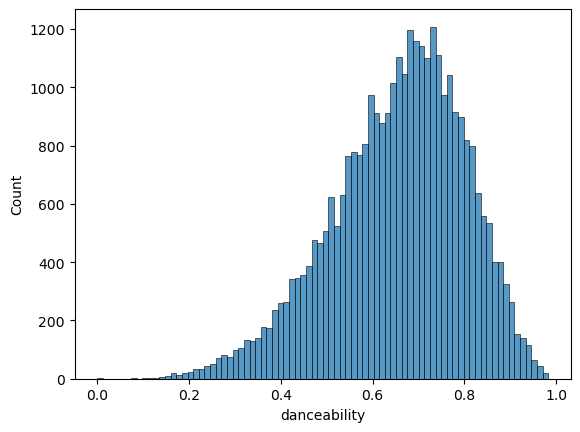

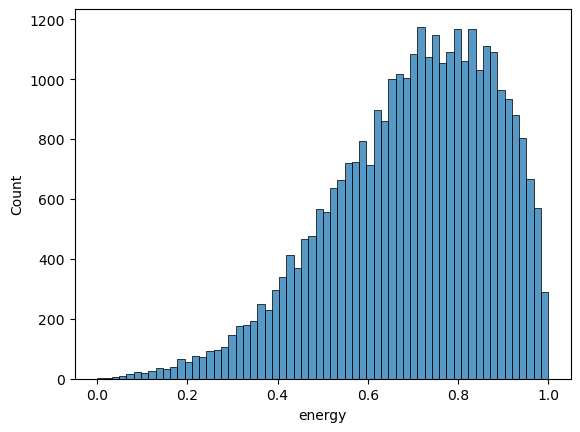

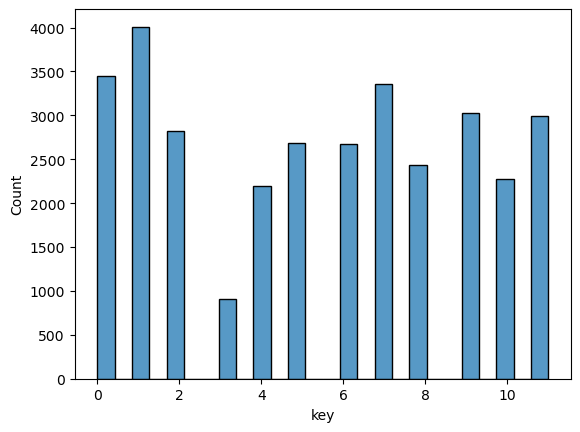

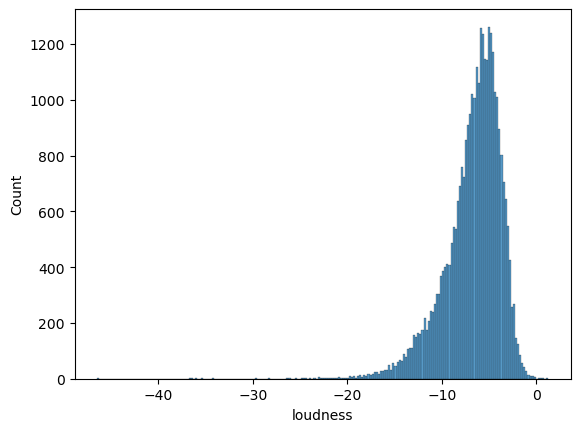

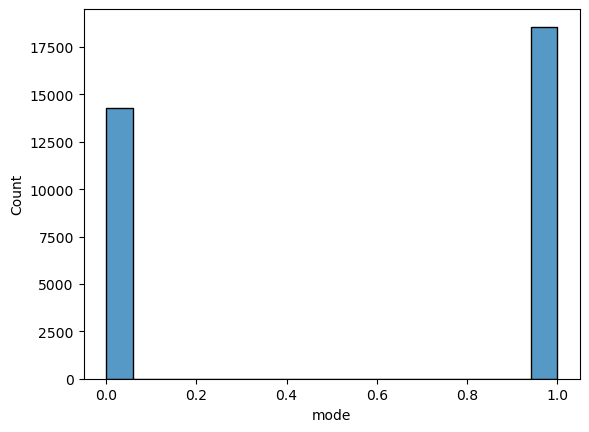

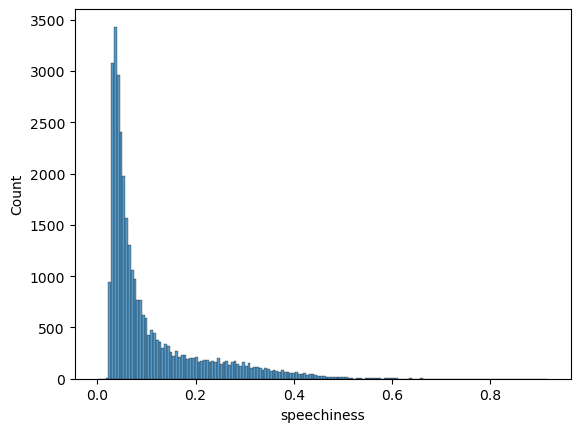

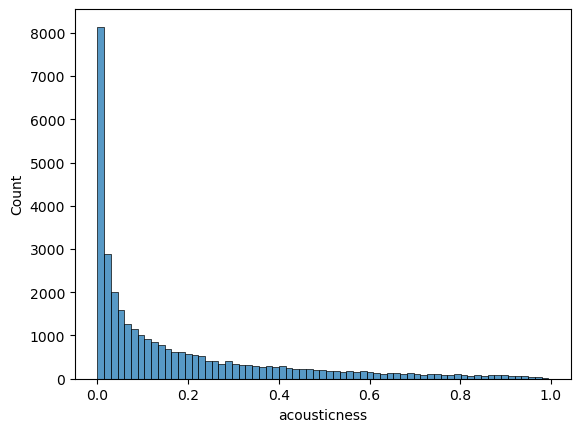

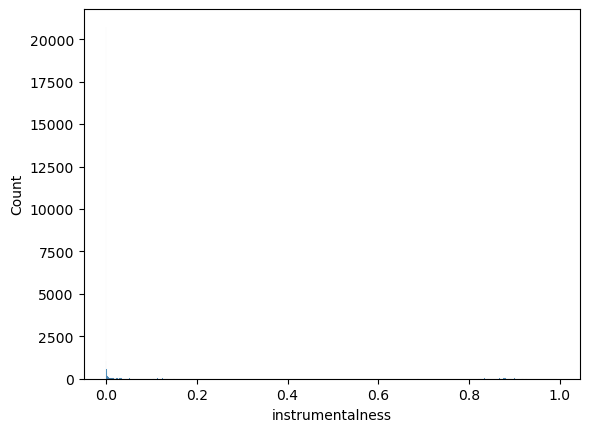

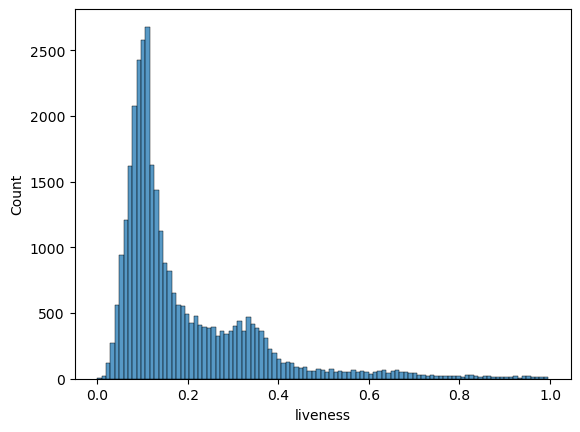

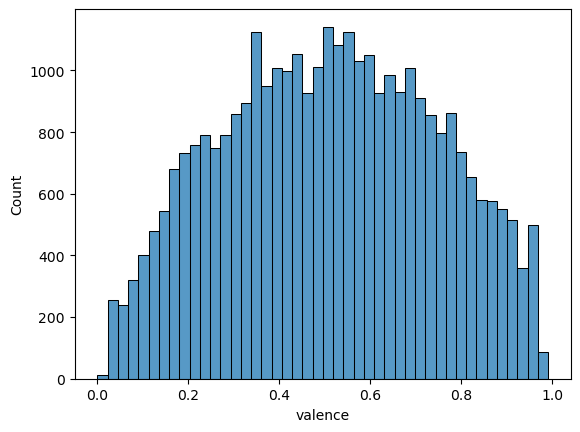

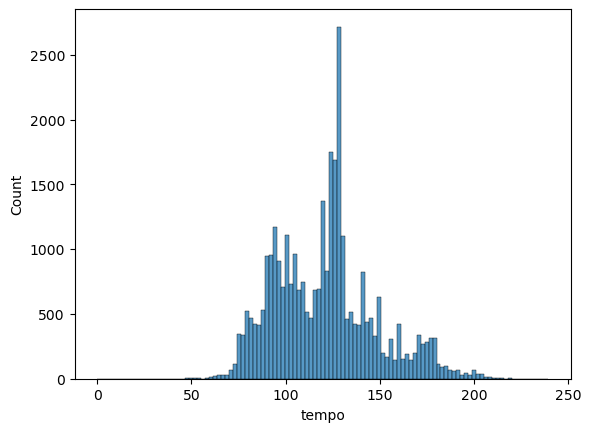

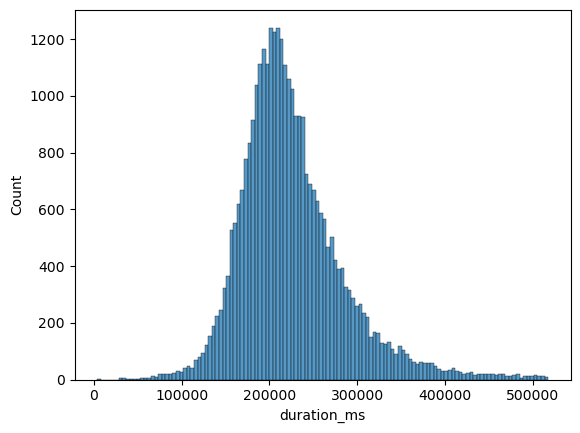

In [247]:
#Histogram to understand distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()
    


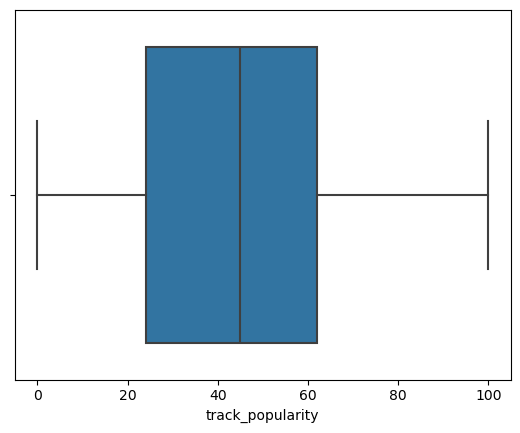

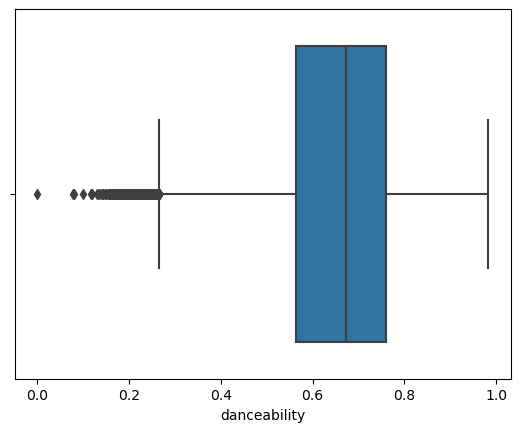

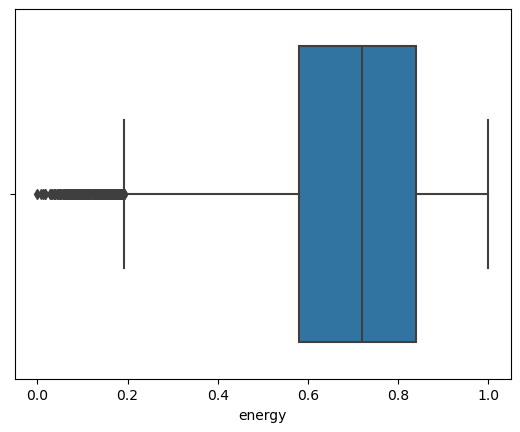

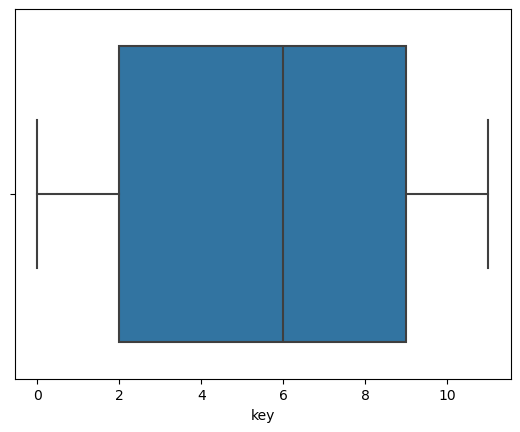

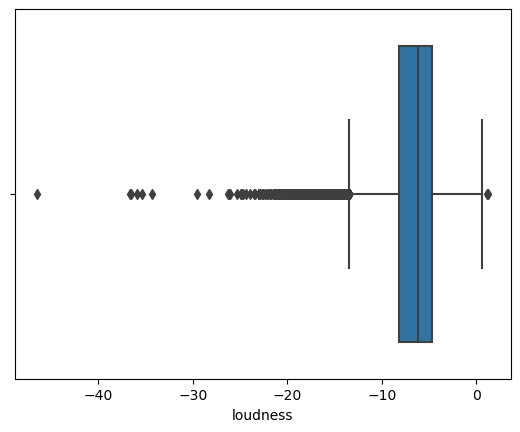

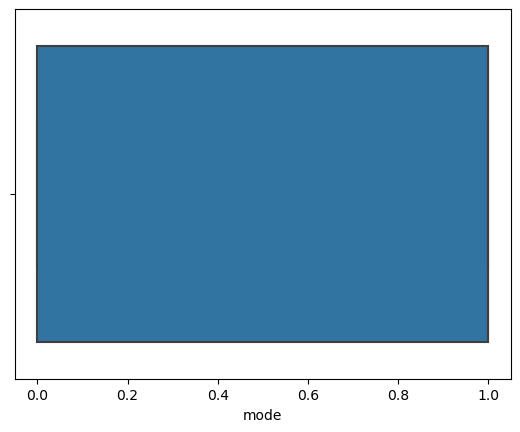

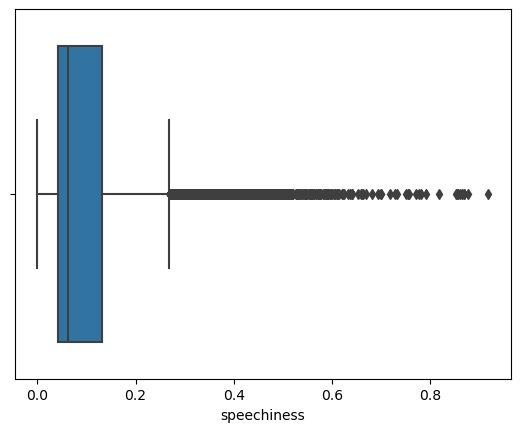

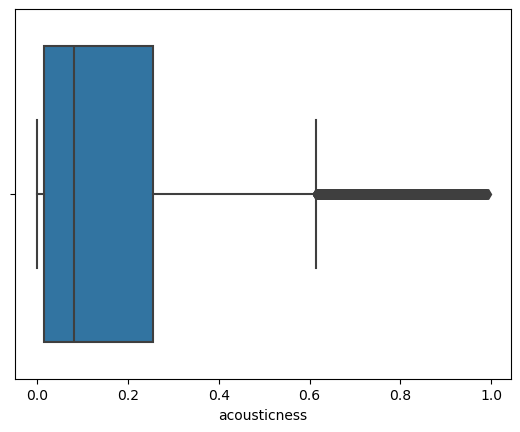

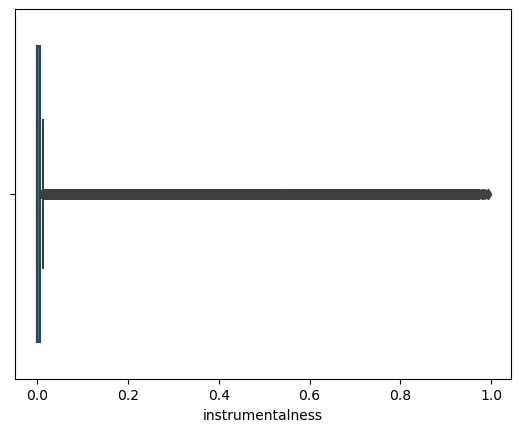

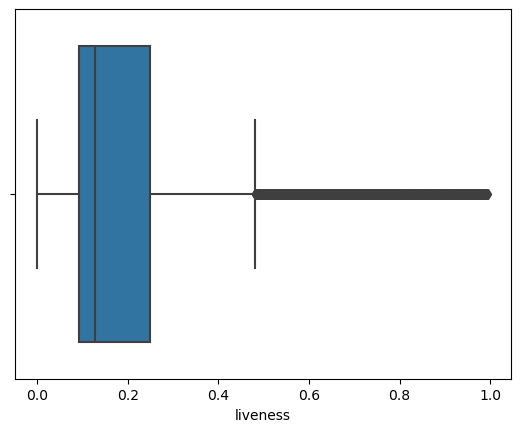

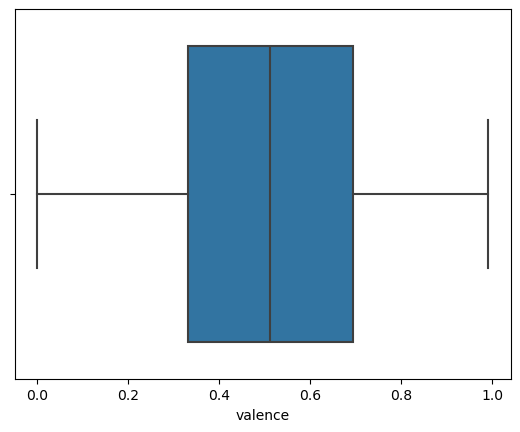

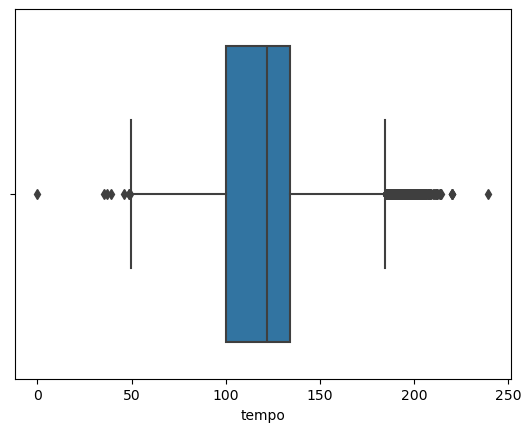

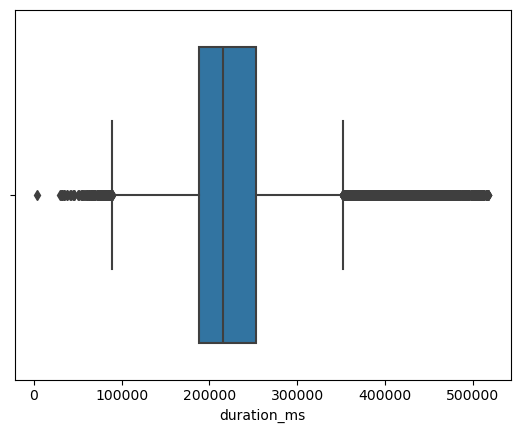

In [251]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [255]:

df.select_dtypes(include="number").columns

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

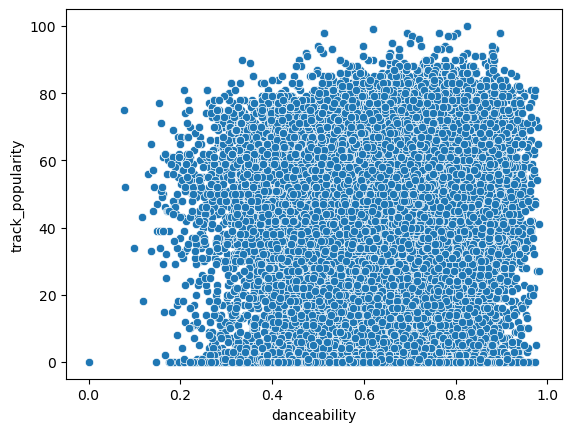

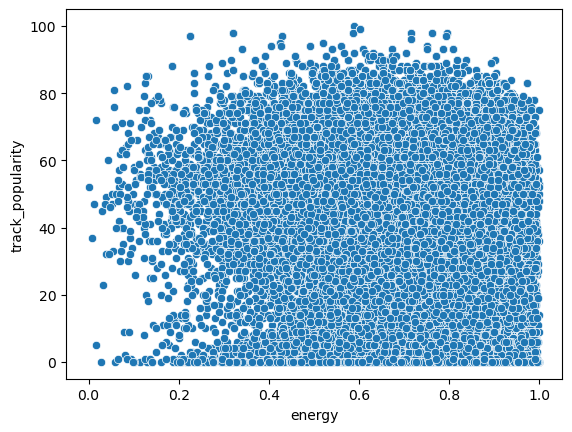

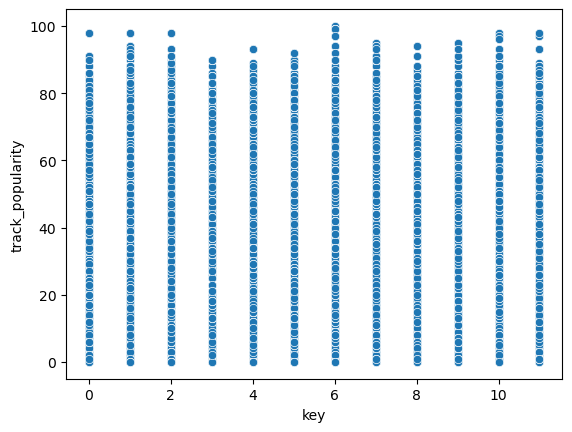

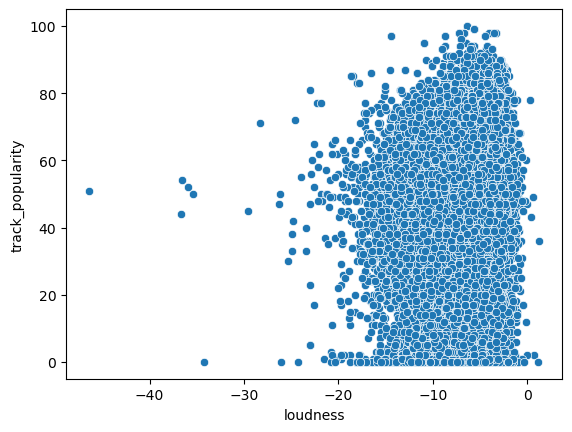

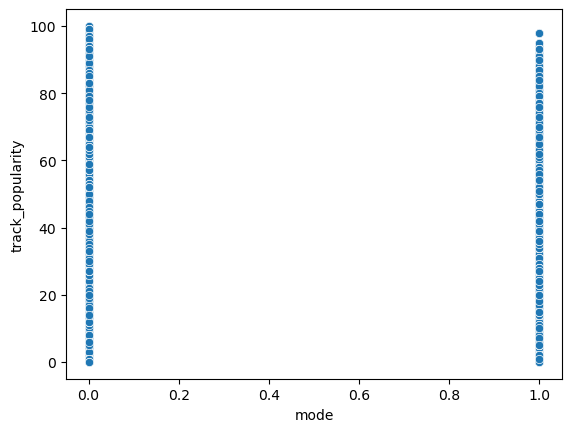

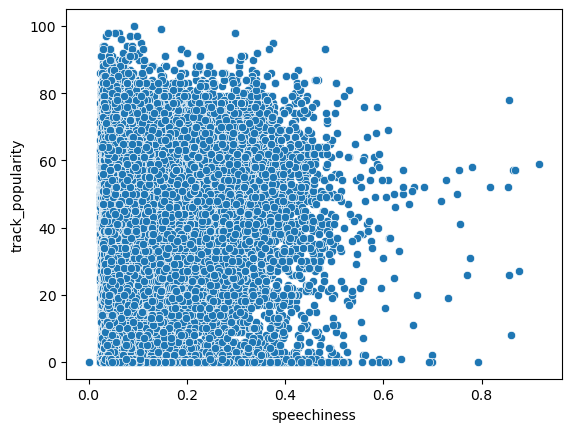

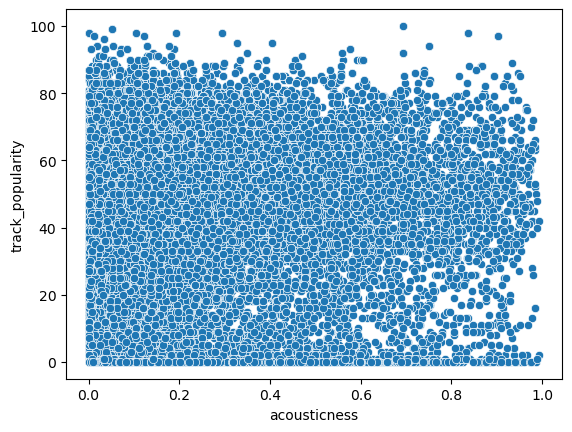

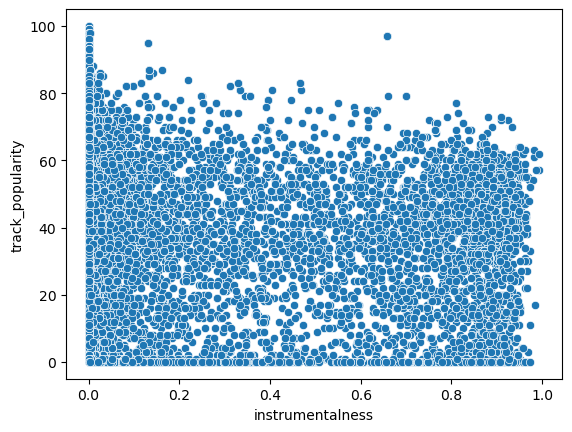

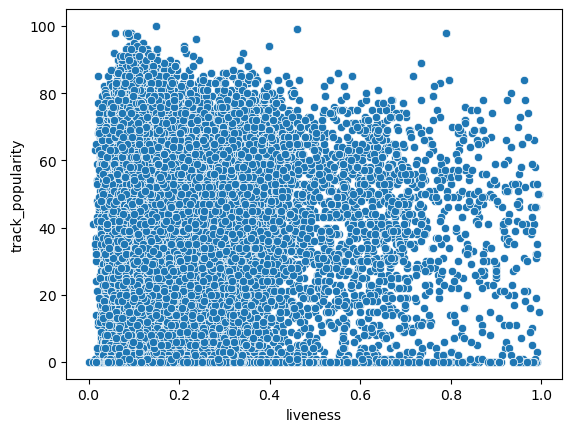

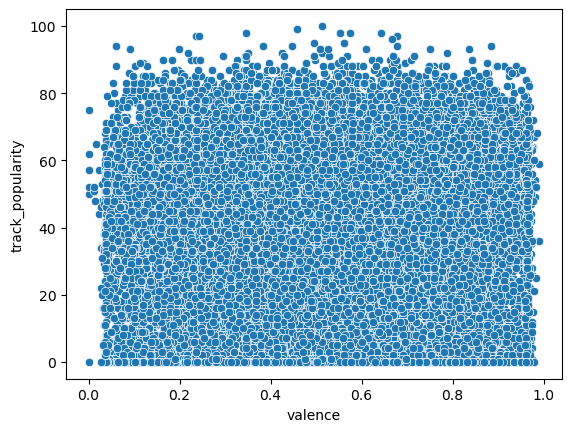

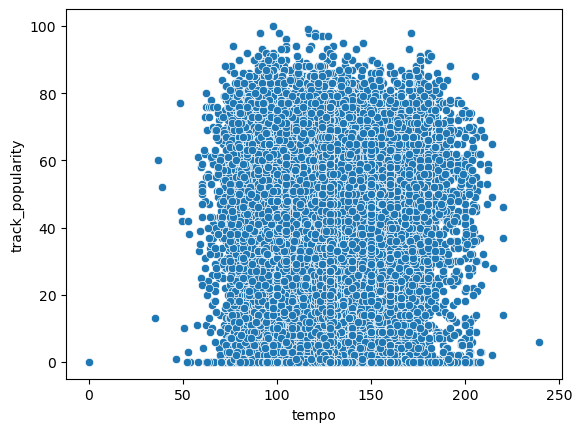

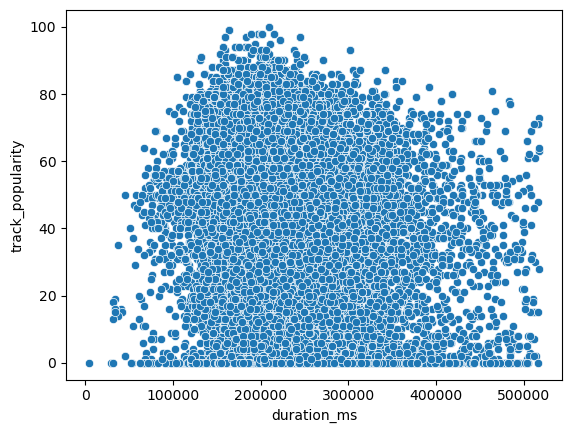

In [259]:
#Scatter plot 

for i in [ 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']:
    sns.scatterplot(data=df,x=i,y='track_popularity')
    plt.show()
      

                                                 CORRELATIOIN WITH HEATMAP

In [267]:

s=df.select_dtypes(include="number").corr()
s

track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.064748 -0.109112 -0.000650   
danceability              0.064748      1.000000 -0.086073  0.011736   
energy                   -0.109112     -0.086073  1.000000  0.010052   
key                      -0.000650      0.011736  0.010052  1.000000   
loudness                  0.057687      0.025335  0.676625  0.000959   
mode                      0.010637     -0.058647 -0.004800 -0.174093   
speechiness               0.006819      0.181721 -0.032150  0.022607   
acousticness              0.085159     -0.024519 -0.539745  0.004306   
instrumentalness         -0.149872     -0.008655  0.033247  0.005968   
liveness                 -0.054584     -0.123859  0.161223  0.002887   
valence                   0.033231      0.330523  0.151103  0.019914   
tempo                    -0.005378     -0.184084  0.149951 -0.013370   
duration_ms              -0.143682     -0.096879  0.012611  0.015139   

                  loudness      mode  speechiness  acousticness  \
track_popularity  0.057687  0.010637     0.006819      0.085159   
danceability      0.025335 -0.058647     0.181721     -0.024519   
energy            0.676625 -0.004800    -0.032150     -0.539745   
key               0.000959 -0.174093     0.022607      0.004306   
loudness          1.000000 -0.019289     0.010339     -0.361638   
mode             -0.019289  1.000000    -0.063512      0.009415   
speechiness       0.010339 -0.063512     1.000000      0.026092   
acousticness     -0.361638  0.009415     0.026092      1.000000   
instrumentalness -0.147824 -0.006741    -0.103424     -0.006850   
liveness          0.077613 -0.005549     0.055426     -0.077243   
valence           0.053384  0.002614     0.064659     -0.016845   
tempo             0.093767  0.014329     0.044603     -0.112724   
duration_ms      -0.115058  0.015634    -0.089431     -0.081581   

                  instrumentalness  liveness   valence     tempo  duration_ms  
track_popularity         -0.149872 -0.054584  0.033231 -0.005378    -0.143682  
danceability             -0.008655 -0.123859  0.330523 -0.184084    -0.096879  
energy                    0.033247  0.161223  0.151103  0.149951     0.012611  
key                       0.005968  0.002887  0.019914 -0.013370     0.015139  
loudness                 -0.147824  0.077613  0.053384  0.093767    -0.115058  
mode                     -0.006741 -0.005549  0.002614  0.014329     0.015634  
speechiness              -0.103424  0.055426  0.064659  0.044603    -0.089431  
acousticness             -0.006850 -0.077243 -0.016845 -0.112724    -0.081581  
instrumentalness          1.000000 -0.005507 -0.175402  0.023335     0.063235  
liveness                 -0.005507  1.000000 -0.020560  0.021018     0.006138  
valence                  -0.175402 -0.020560  1.000000 -0.025732    -0.032225  
tempo                     0.023335  0.021018 -0.025732  1.000000    -0.001412  
duration_ms               0.063235  0.006138 -0.032225 -0.001412     1.000000

<Axes: >

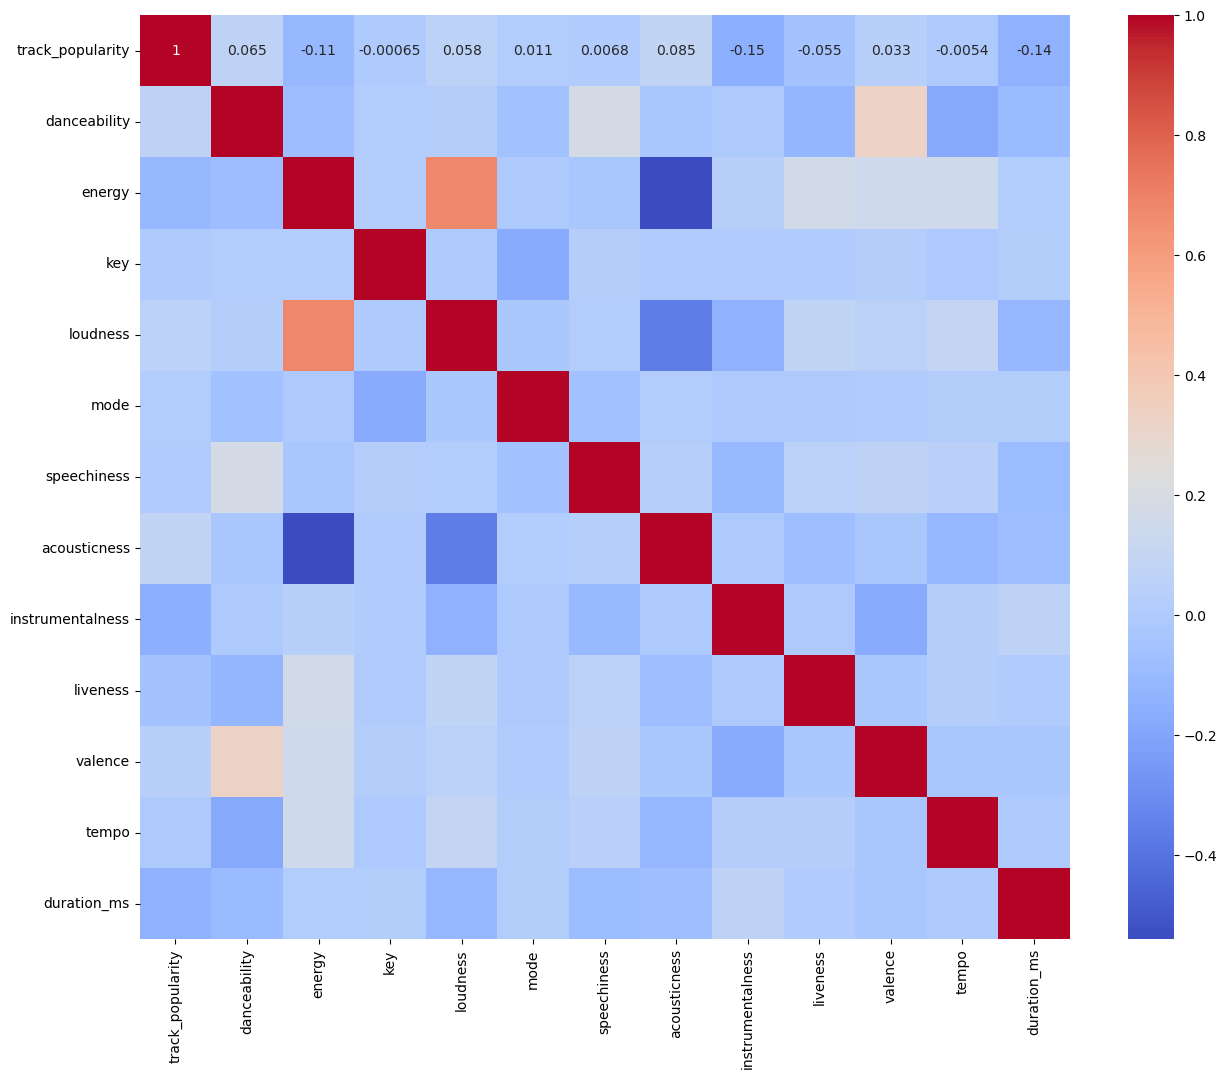

In [271]:
s
plt.figure(figsize=(15,12))
sns.heatmap(s,annot=True,cmap='coolwarm')

MISSING VALUES TREATMENT

In [279]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [283]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [287]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform((df[[i]]))

In [291]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [295]:
df.dropna(inplace=True)
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

OUTLIER TREATMENT

In [303]:
 def wisker(col):
     q1,q3=np.percentile(col,[25,75])
     iqr=q3-q1
     lw=q1-1.5*iqr
     uw=q3+1.5*iqr
     return lw,uw

In [307]:
wisker(df['danceability'])


(0.26599999999999985, 1.058)

In [311]:
for i in ['danceability','energy','loudness','tempo','speechiness','loudness','duration_ms','acousticness']:
             lw,uw=wisker(df[i])
             df[i]=np.where(df[i]<lw,lw,df[i])
             df[i]=np.where(df[i]>uw,uw,df[i])

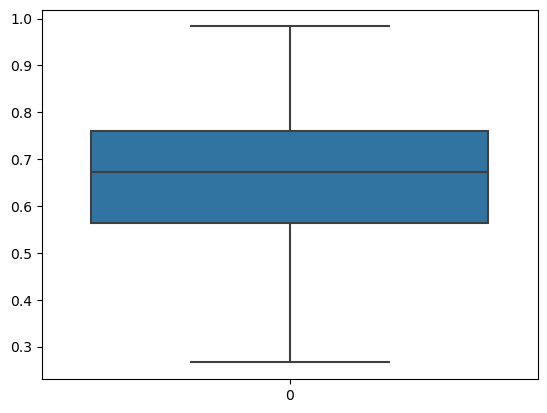

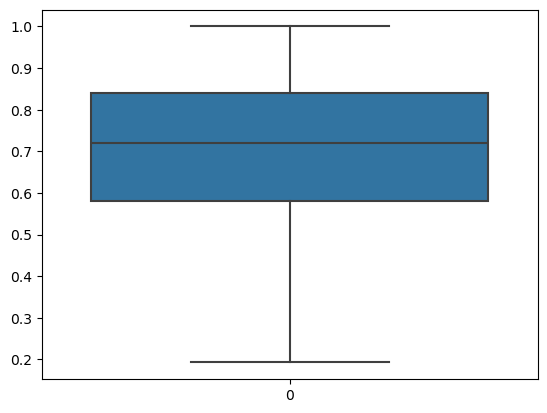

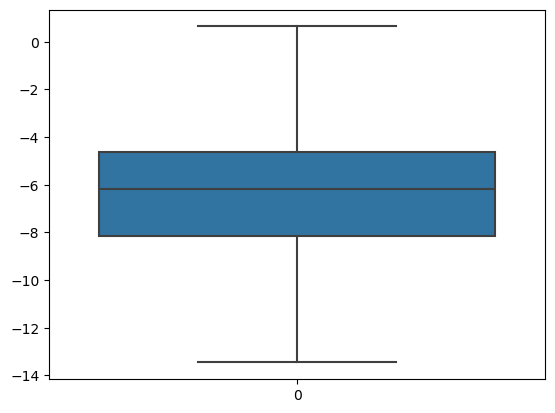

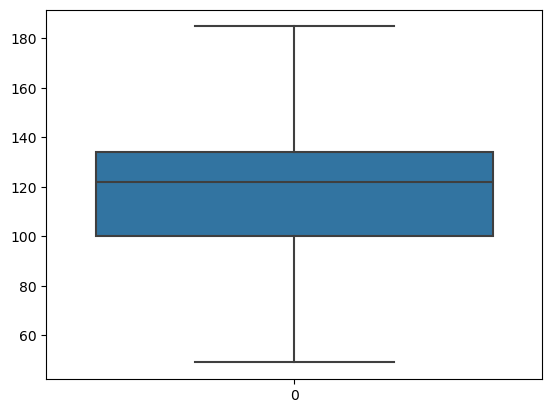

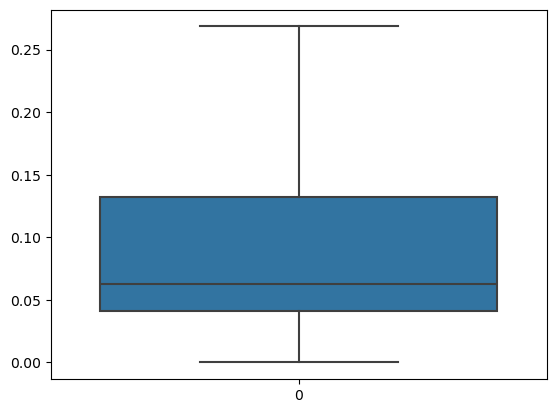

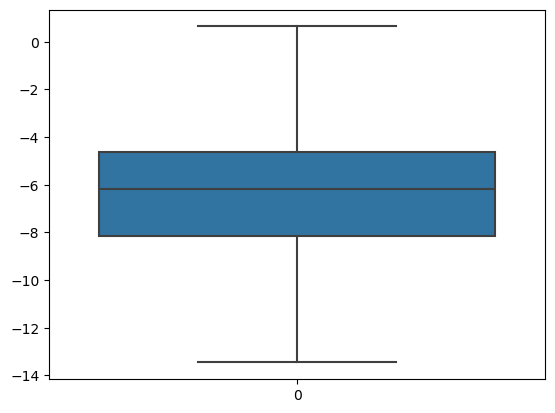

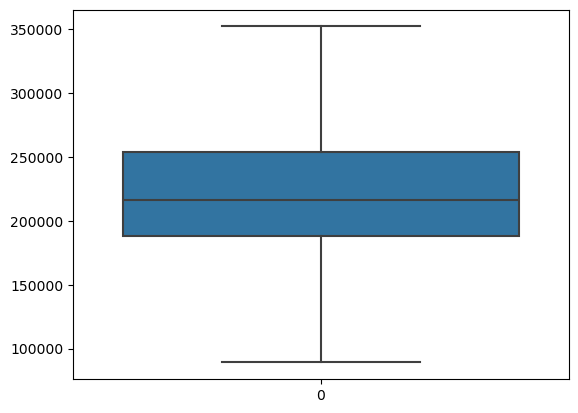

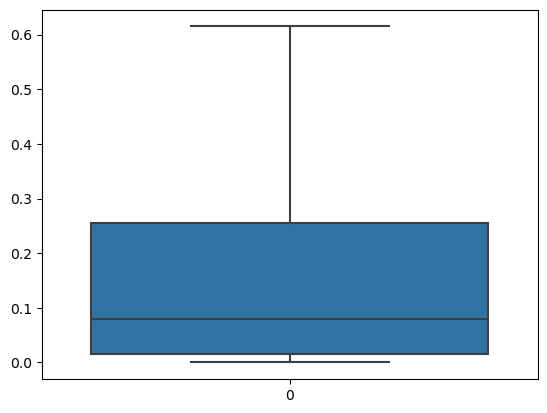

In [315]:
for i in ['danceability','energy','loudness','tempo','speechiness','loudness','duration_ms','acousticness']:
    sns.boxplot(df[i])
    plt.show()

In [319]:
df.drop_duplicates()

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                  66.0  2oCs0DGTsRO98Gh5ZSl2Cx   
1                  67.0  63rPSO264uRjW1X5E6cWv6   
2                  70.0  1HoSmj2eLcsrR0vE9gThr4   
3                  60.0  1nqYsOef1yKKuGOVchbsk6   
4                  69.0  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828              42.0  2azRoBBWEEEYhqV6sb7JrT   
32829              20.0  6kD6KLxj7s8eCE3ABvAyf5   
32830              14.0  0ltWNSY9JgxoIZO4VzuCa6   
32831              15.0  1fGrOkHnHJcStl14zNx8Jy   
32832              27.0  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ...   key  loudness  mode  speechiness  acousticness  \
0                pop  ...   6.0    -2.634   1.0       0.0583      0.102000   
1                pop  ...  11.0    -4.969   1.0       0.0373      0.072400   
2                pop  ...   1.0    -3.432   0.0       0.0742      0.079400   
3                pop  ...   7.0    -3.778   1.0       0.1020      0.028700   
4                pop  ...   1.0    -4.672   1.0       0.0359  

ENCODING OF DATA


In [327]:
import pandas as pd

dummy = pd.get_dummies(data=df, columns=[
    "track_id",
    "track_name",
    "track_artist",
    "track_popularity",
    "track_album_id",
    "track_album_name",
    "track_album_release_date",
    "playlist_name",
    "playlist_id",
    "playlist_genre"
], drop_first=True)


In [331]:
dummy #DATA IS READY TO FIT THE MODEL

playlist_subgenre  danceability  energy   key  loudness  mode  \
0                      dance pop         0.748   0.916   6.0    -2.634   1.0   
1                      dance pop         0.726   0.815  11.0    -4.969   1.0   
2                      dance pop         0.675   0.931   1.0    -3.432   0.0   
3                      dance pop         0.718   0.930   7.0    -3.778   1.0   
4                      dance pop         0.650   0.833   1.0    -4.672   1.0   
...                          ...           ...     ...   ...       ...   ...   
32828  progressive electro house         0.428   0.922   2.0    -1.814   1.0   
32829  progressive electro house         0.522   0.786   0.0    -4.462   1.0   
32830  progressive electro house         0.529   0.821   6.0    -4.899   0.0   
32831  progressive electro house         0.626   0.888   2.0    -3.361   1.0   
32832  progressive electro house         0.603   0.884   5.0    -4.571   0.0   

       speechiness  acousticness  instrumentalness  liveness  ...  \
0           0.0583      0.102000          0.000000    0.0653  ...   
1           0.0373      0.072400          0.004210    0.3570  ...   
2           0.0742      0.079400          0.000023    0.1100  ...   
3           0.1020      0.028700          0.000009    0.2040  ...   
4           0.0359      0.080300          0.000000    0.0833  ...   
...            ...           ...               ...       ...  ...   
32828       0.0936      0.076600          0.000000    0.0668  ...   
32829       0.0420      0.001710          0.004270    0.3750  ...   
32830       0.0481      0.108000          0.000001    0.1500  ...   
32831       0.1090      0.007920          0.127000    0.3430  ...   
32832       0.0385      0.000133          0.341000    0.7420  ...   

       playlist_id_7sq6nuruoMyDhEWkX2oYOg  playlist_id_7tkgK1tm9hYkWp7EFyOcAr  \
0                                   False                               False   
1                                   False                               False   
2                                   False                               False   
3                                   False                               False   
4                                   False                               False   
...                                   ...                                 ...   
32828                               False                               False   
32829                               False                               False   
32830                               False                               False   
32831                               False                               False   
32832                               False                               False   

       playlist_id_7vJOXFe40axY7qS39vGDyH  playlist_id_7xWdFCrU5Gka6qp1ODrSdK  \
0                                   False                               False   
1                                   False                               False   
2                                   False                               False   
3                                   False                               False   
4                                   False                               False   
...                                   ...                                 ...   
32828                               False                               False   
32829                               False                               False   
32830                               False                               False   
32831                               False                               False   
32832                               False                               False   

       playlist_id_7xWuNevFBmwnFEg6wzdCc7  playlist_genre_latin  \
0                                   False                 False   
1                                   False                 False   
2                                   False                 False   
3          

                                                         CLUSTER MODELS

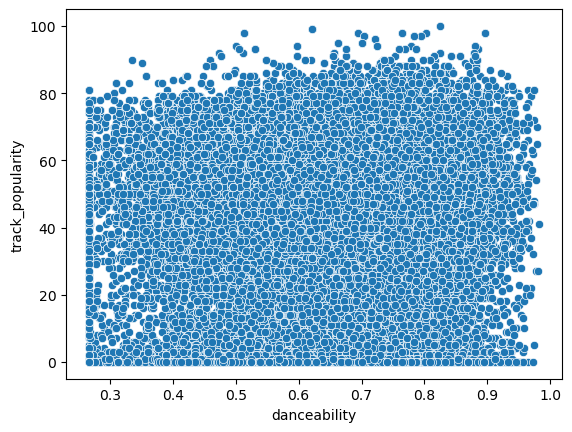

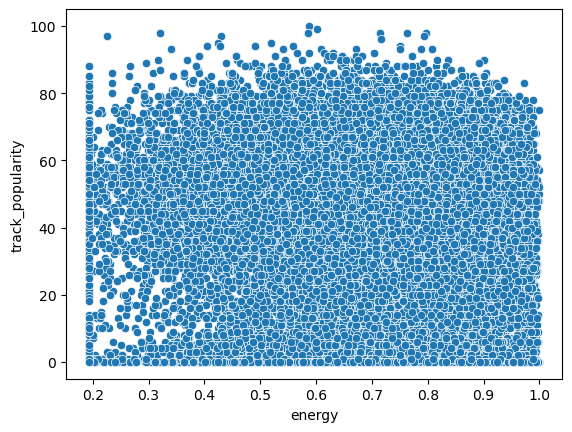

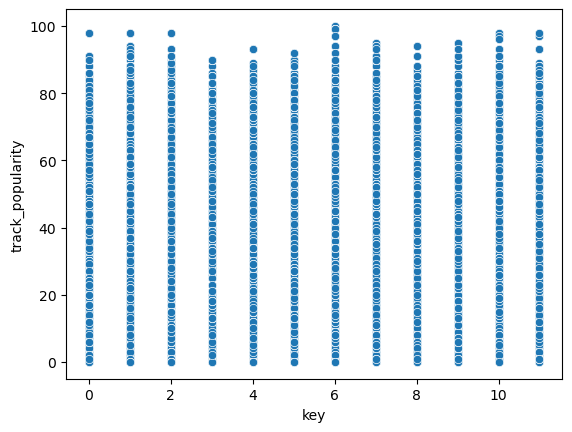

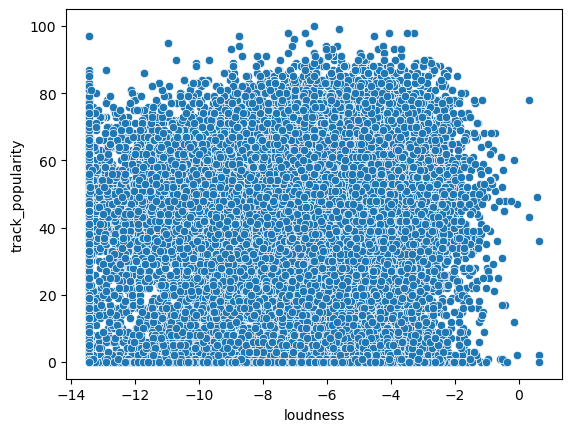

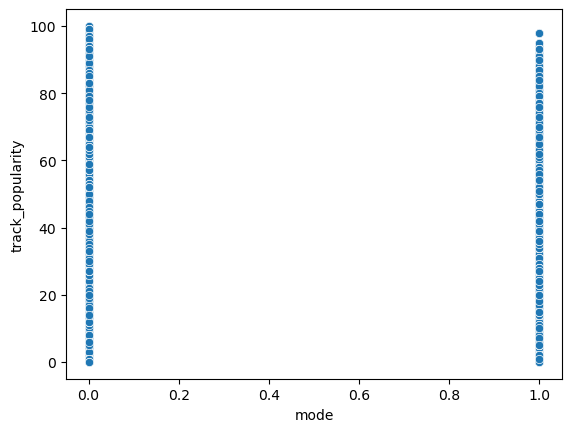

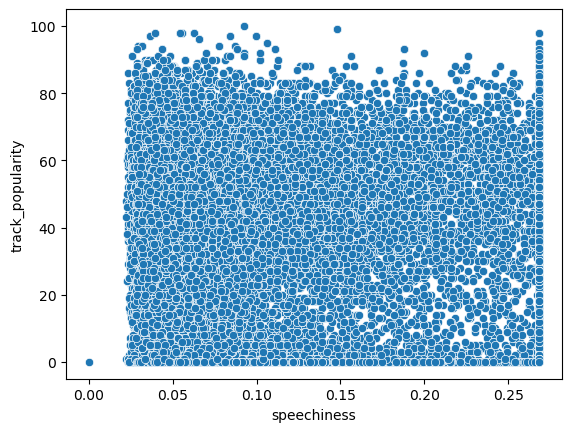

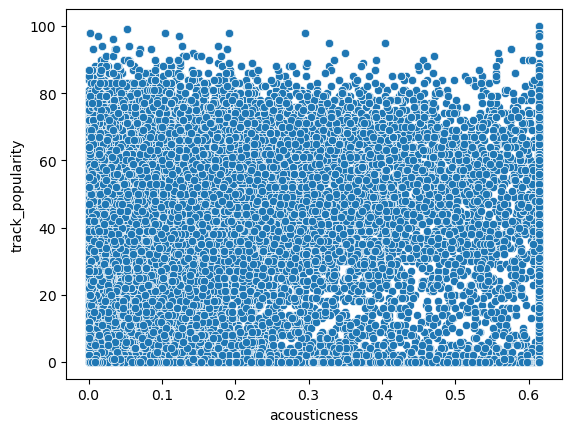

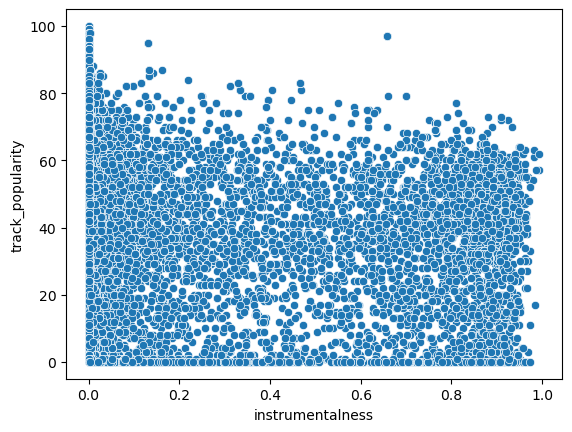

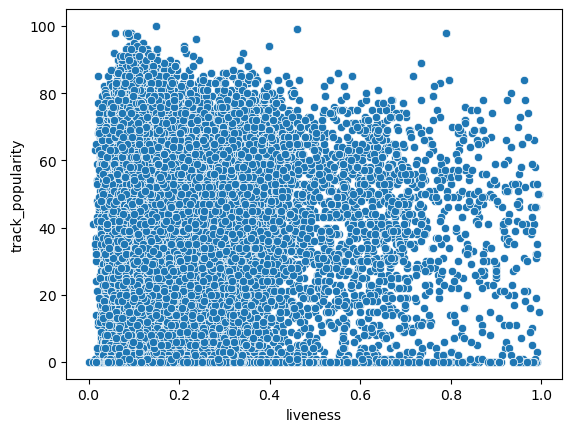

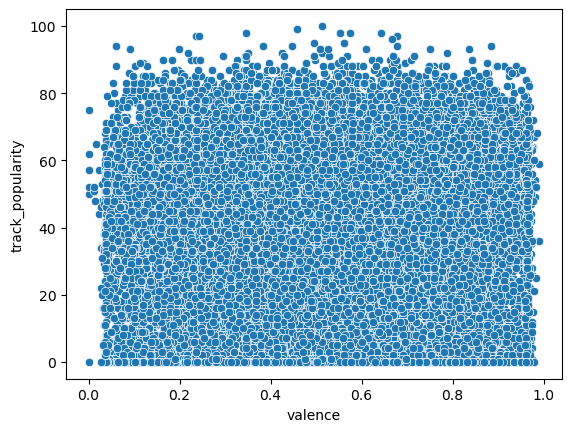

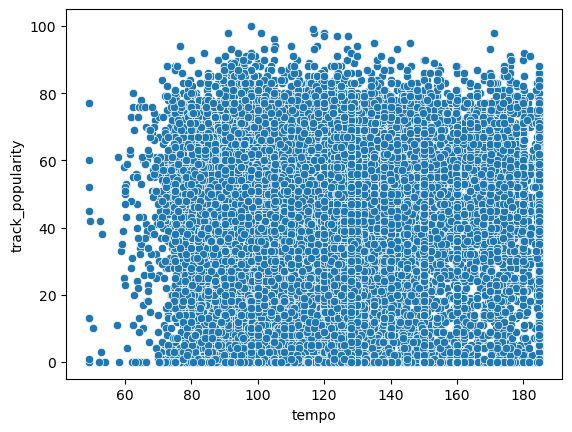

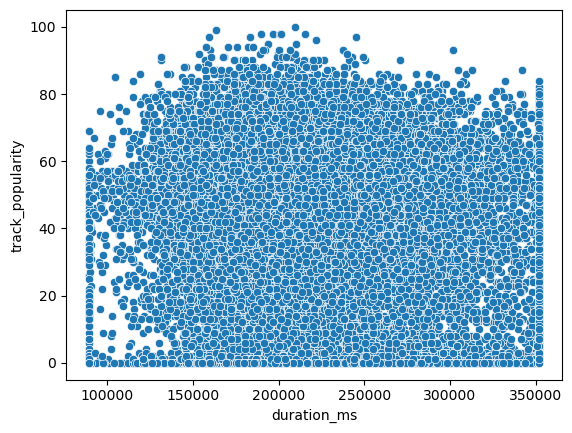

In [339]:
for i in [ 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']:
    sns.scatterplot(data=df,x=i,y='track_popularity')
    plt.show()

    

In [343]:
from sklearn.preprocessing import StandardScaler 
from sklearn. cluster import KMeans


In [347]:
features=df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]
target=df['track_popularity']

In [351]:
scaler=StandardScaler()
scaled_features= scaler.fit_transform(features)

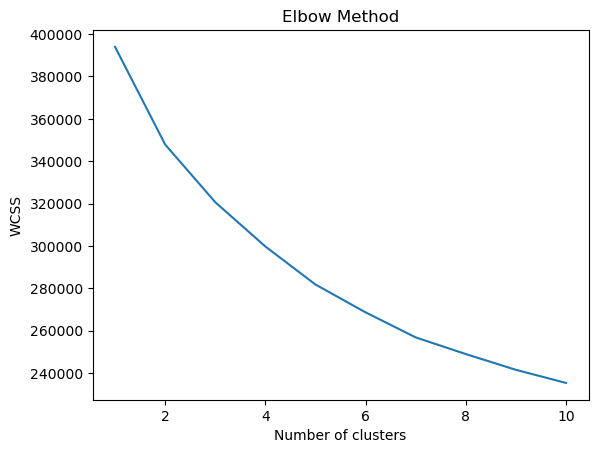

In [355]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [359]:
# elbow formation after 2 so number of clusters=3

In [363]:
n_clusters=3
kmeans=KMeans(n_clusters=n_clusters,random_state=42)

In [367]:
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [371]:
df['clusters']=kmeans.labels_

In [ ]:
sns.pairplot(df, hue='clusters', vars=features.columns)
plt.show()

In [ ]:
for cluster in range(n_clusters):
    print(f"Cluster {cluster}")
    print(df[df['clusters'] == cluster]['track_popularity'].describe())

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_features=pca.fit_transform(scaled_features)

In [ ]:
num_attributes = df.shape[1]  
print(f'The dataset has {num_attributes} attributes.')

In [ ]:
column_names = df.columns
print(f'The attributes are: {list(column_names)}')

                                             PCA(DIMENSIIONALITY REDUCTION)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
scaler.fit(df.select_dtypes(include=['number']))

In [ ]:

scaled_data = scaler.transform(df.select_dtypes(include=['number']))

In [ ]:
scaled_data

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)


In [ ]:
pca.fit(scaled_data)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

In [ ]:
x_pca.shape

In [ ]:
x_pca

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter (x_pca[:,0], x_pca[:, 1], c=df ['track_popularity'])
plt.xlabel('First principle component') 
plt.ylabel( 'Second principle component' )

                                  MODEL TRAINING

In [ ]:
x = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
y = df['track_popularity']

# Split the data into training and testing sets
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(xtrain1)
X_test1 = scaler.transform(xtest1)
xtrain1 = pd.DataFrame(X_train1, columns=x.columns)
xtest1 = pd.DataFrame(X_test1, columns=x.columns)


In [ ]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(xtrain2)
X_test2 = scaler.transform(xtest2)
xtrain2 = pd.DataFrame(X_train2, columns=x.columns)
xtest2 = pd.DataFrame(X_test2, columns=x.columns)

In [ ]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train3 = scaler.fit_transform(xtrain3)
X_test3 = scaler.transform(xtest3)
xtrain3 = pd.DataFrame(X_train3, columns=x.columns)
xtest3 = pd.DataFrame(X_test3, columns=x.columns)

                                     LOGISTIC REGRESSION

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain1, ytrain1)
ypred1 = lr.predict(xtest1)
lr.fit(xtrain2, ytrain2)
ypred2 = lr.predict(xtest2)
lr.fit(xtrain3, ytrain3)
ypred3 = lr.predict(xtest3)

print(ypred1)
accuracy11 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy11*100:.3f}')
print(ypred2)
accuracy12 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy12*100:.3f}')
print(ypred3)
accuracy13 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy13*100:.3f}')

                                               RANDOM FOREST 

In [ ]:
rf = RandomForestClassifier(n_estimators=35,criterion='entropy')
rf.fit(xtrain1, ytrain1)
ypred1 = rf.predict(xtest1)
rf.fit(xtrain2, ytrain2)
ypred2 = rf.predict(xtest2)
rf.fit(xtrain3, ytrain3)
ypred3 = rf.predict(xtest3)

print(ypred1)
accuracy31 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy31*100:.3f}')
print(ypred2)
accuracy32 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy32*100:.3f}')
print(ypred3)
accuracy33 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy33*100:.3f}')

                                                    GAUSIAN NAIVE BAYES

In [ ]:
gnb = GaussianNB()
gnb.fit(xtrain1, ytrain1)
ypred1 = gnb.predict(xtest1)
gnb.fit(xtrain2, ytrain2)
ypred2 = gnb.predict(xtest2)
gnb.fit(xtrain3, ytrain3)
ypred3 = gnb.predict(xtest3)

print(ypred1)
accuracy41 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy41*100:.3f}')
print(ypred2)
accuracy42 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy42*100:.3f}')
print(ypred3)
accuracy43 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy43*100:.3f}')

                                                                KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(xtrain1, ytrain1)
ypred1 = knn.predict(xtest1)
knn.fit(xtrain2, ytrain2)
ypred2 = knn.predict(xtest2)
knn.fit(xtrain3, ytrain3)
ypred3 = knn.predict(xtest3)

print(ypred1)
accuracy51 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy51*100:.3f}')
print(ypred2)
accuracy52 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy52*100:.3f}')
print(ypred3)
accuracy53 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy53*100:.3f}')

                                                               SVM

In [ ]:
svm = SVC(kernel='linear')
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy161 = accuracy_score(ytest1, ypred1)
print(f'Accuracy Linear Kernel (80-20): {accuracy161*100:.3f}')
print(ypred2)
accuracy162 = accuracy_score(ytest2, ypred2)
print(f'Accuracy Linear Kernel (70-30): {accuracy162*100:.3f}')
print(ypred3)
accuracy163 = accuracy_score(ytest3, ypred3)
print(f'Accuracy Linear Kernel (60-40): {accuracy163*100:.3f}')

In [ ]:
svm = SVC(kernel='poly', C=7)
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy261 = accuracy_score(ytest1, ypred1)
print(f'Accuracy Poly Kernel (80-20): {accuracy261*100:.3f}')
print(ypred2)
accuracy262 = accuracy_score(ytest2, ypred2)
print(f'Accuracy Poly Kernel (70-30): {accuracy262*100:.3f}')
print(ypred3)
accuracy263 = accuracy_score(ytest3, ypred3)
print(f'Accuracy Poly Kernel (60-40): {accuracy263*100:.3f}')

In [ ]:
svm = SVC(kernel='rbf', C=12, gamma='auto')
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy361 = accuracy_score(ytest1, ypred1)
print(f'Accuracy RBF Kernel (80-20): {accuracy361*100:.3f}')
print(ypred2)
accuracy362 = accuracy_score(ytest2, ypred2)
print(f'Accuracy RBF Kernel (70-30): {accuracy362*100:.3f}')
print(ypred3)
accuracy363 = accuracy_score(ytest3, ypred3)
print(f'Accuracy RBF Kernel (60-40): {accuracy363*100:.3f}')

In [ ]:
svm = SVC(kernel='sigmoid')
svm.fit(xtrain1, ytrain1)
ypred1 = svm.predict(xtest1)
svm.fit(xtrain2, ytrain2)
ypred2 = svm.predict(xtest2)
svm.fit(xtrain3, ytrain3)
ypred3 = svm.predict(xtest3)

print(ypred1)
accuracy461 = accuracy_score(ytest1, ypred1)
print(f'Accuracy Sigmoid Kernel (80-20): {accuracy461*100:.3f}')
print(ypred2)
accuracy462 = accuracy_score(ytest2, ypred2)
print(f'Accuracy Sigmoid Kernel (70-30): {accuracy462*100:.3f}')
print(ypred3)
accuracy463 = accuracy_score(ytest3, ypred3)
print(f'Accuracy Sigmoid Kernel (60-40): {accuracy463*100:.3f}')

                                                    XG BOOST

In [ ]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(xtrain1, ytrain1)
ypred1 = xgb.predict(xtest1)
xgb.fit(xtrain2, ytrain2)
ypred2 = xgb.predict(xtest2)
xgb.fit(xtrain3, ytrain3)
ypred3 = xgb.predict(xtest3)

print(ypred1)
accuracy71 = accuracy_score(ytest1, ypred1)
print(f'Accuracy (80-20): {accuracy71*100:.3f}')
print(ypred2)
accuracy72 = accuracy_score(ytest2, ypred2)
print(f'Accuracy (70-30): {accuracy72*100:.3f}')
print(ypred3)
accuracy73 = accuracy_score(ytest3, ypred3)
print(f'Accuracy (60-40): {accuracy73*100:.3f}')